# Exercice: Introduction à Numpy

Inspiré par les travaux d'Alexandre Gramfort (INRIA)

L'objectif principal de ce notebook est de se familiariser avec Python et NumPy en manipulant un jeu de données célèbre dans le domaine de l'apprentissage automatique.

Les données sont intégrées dans la bibliothèque `scikit-learn`.

Ce jeu de données est connu sous le nom de digits et contient des images de chiffres écrits à la main avec leurs étiquettes associées.

# Manipulations et visualisation du jeu de données `digtits`.

## Imports et intialisation

In [21]:
%matplotlib inline                      

import numpy as np                      # charge un package pour le numérique
import matplotlib.pyplot as plt         # charge un package pour les graphiques

## Description

Nous allons charger le jeu de données `digits` disponible dans `scikit-learn` (le nom de l'importation est `sklearn`). Ce jeu de données contient des images de chiffres écrits à la main.

In [22]:
# Load the dataset from scikit-learn
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

In [23]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [24]:
X.shape

(1797, 64)

In [25]:
X.ndim

2

In [26]:
y.shape

(1797,)

In [27]:
y.size

1797

In [28]:
X.size, 1797*64

(115008, 115008)

In [29]:
X[0, :].size

64

In [30]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [31]:
y.max(), y.min()

(9, 0)

In [32]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
print(f"Nombre de pixels (features):      {X.shape[1]}")
print(f"Nombre d'images (samples):       {X.shape[0]}")
print(f"Nombre de classes:                {len(np.unique(y))}")

Nombre de pixels (features):      64
Nombre d'images (samples):       1797
Nombre de classes:                10


In [34]:
# Choix d'une image.
idx_to_test = 15

print("Une ligne du tableau (i.e., image):")
print(X[idx_to_test, :])
print("Classe associée :")
print(y[idx_to_test])

Une ligne du tableau (i.e., image):
[ 0.  5. 12. 13. 16. 16.  2.  0.  0. 11. 16. 15.  8.  4.  0.  0.  0.  8.
 14. 11.  1.  0.  0.  0.  0.  8. 16. 16. 14.  0.  0.  0.  0.  1.  6.  6.
 16.  0.  0.  0.  0.  0.  0.  5. 16.  3.  0.  0.  0.  1.  5. 15. 13.  0.
  0.  0.  0.  4. 15. 16.  2.  0.  0.  0.]
Classe associée :
5


Exercice:
* Type de X ? y ?
* Changez idx_to_test. Sans regarder y[idx_to_test], pouvez vous reconnaitre le chiffre ?

In [35]:
X.dtype, y.dtype

(dtype('float64'), dtype('int64'))

In [36]:
X[idx_to_test]

array([ 0.,  5., 12., 13., 16., 16.,  2.,  0.,  0., 11., 16., 15.,  8.,
        4.,  0.,  0.,  0.,  8., 14., 11.,  1.,  0.,  0.,  0.,  0.,  8.,
       16., 16., 14.,  0.,  0.,  0.,  0.,  1.,  6.,  6., 16.,  0.,  0.,
        0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  1.,  5., 15.,
       13.,  0.,  0.,  0.,  0.,  4., 15., 16.,  2.,  0.,  0.,  0.])

## Visualisation des données :

Les images numérisées ont une taille de 8 x 8, soit un total de 64 pixels. Elles sont stockées dans un vecteur de lignes qui doit être remodelé pour être visualisé en tant qu'image. Vous pouvez utiliser la fonction `numpy.reshape` pour transformer le tableau 1D en un tableau 2D de 8 x 8 valeurs.

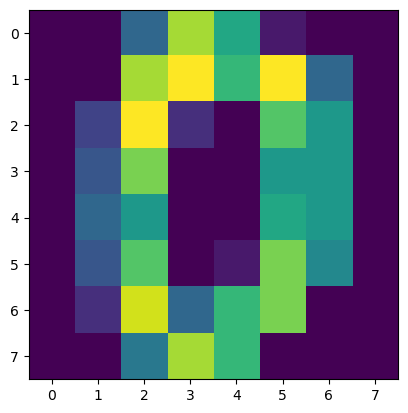

In [37]:
# Nous utilisons `imshow` pour visualiser l'image
plt.imshow(np.reshape(X[0, :], (8, 8)));

Text(0.5, 1.0, "La classe liée à l'image 15 est 5")

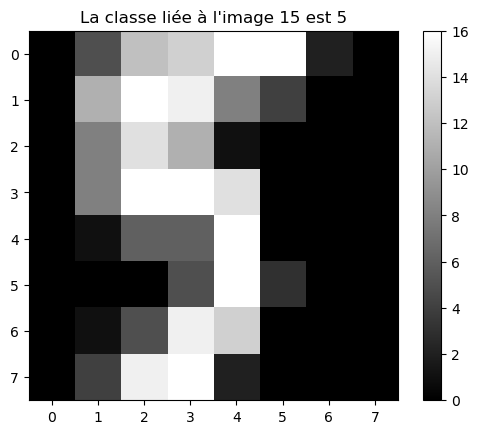

In [38]:
# Utilisez une carte de couleurs en niveaux de gris pour une meilleure visualisation
plt.imshow(np.reshape(X[idx_to_test, :], (8, 8)),
           cmap='gray', aspect='equal', interpolation='nearest')
plt.colorbar()
plt.title(f"La classe liée à l'image {idx_to_test} est {y[idx_to_test]}")

Exercice :
* Montrer une image avec 1 ligne et 1 colonne sur 2 (*Indication*: qu'est ce qui en Python pourrait faire ça ?)
* Montrer la distribution des pixels en utilisant `plt.hist`).

In [40]:
img = X[0].reshape((8, 8))

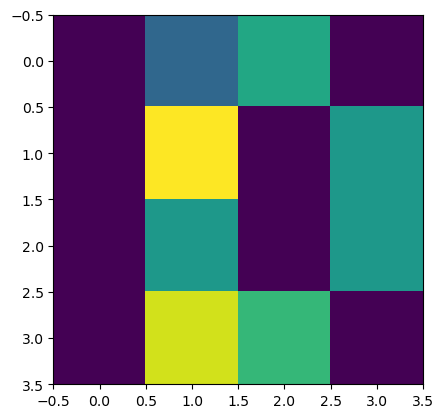

In [41]:
plt.imshow(img[::2, ::2])

(array([31.,  2.,  3.,  4.,  2.,  5.,  5.,  2.,  6.,  4.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

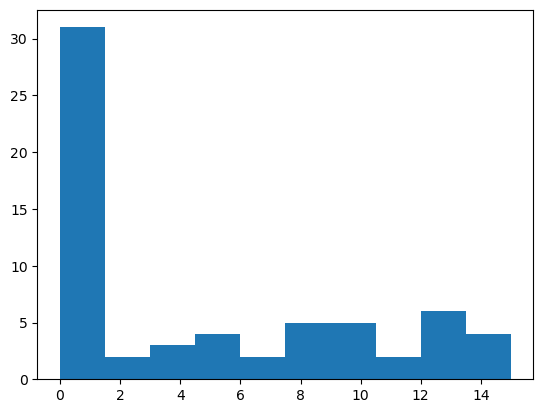

In [44]:
plt.hist(img.ravel())


## Statistiques Basiques

Pour mieux comprendre la base de données on va s'intéresser à quelques statistiques. 
On commence par calculer les moyennes et variances par classes pour chacun des chiffres. La moyenne par classe se visualise comme une image qui est une représentantion moyenne pour chaque chiffre de zéro à neuf. Idem pour la variance, ce qui permet alors de voir les parties avec les plus grandes variations entre les membres d'une même classe.

Pour mieux comprendre la base de données, nous allons vérifier quelques statistiques.
Nous pouvons commencer par examiner la moyenne et la variance de chaque chiffre de la classe.
Nous pouvons représenter la moyenne et la variance sous la forme d'une image de 8 x 8.

* Quelle est la représentation des images de la moyenne et de la variance ?

In [39]:
classes_list = np.unique(y).astype(int)
print("Liste des classes en présence: ", classes_list)

Liste des classes en présence:  [0 1 2 3 4 5 6 7 8 9]


Exercice :
* Calculer un représentant moyen du chiffre 0 (l'image qui en pixel i,j contient la valeur moyenne du pixel i,j parmis tous les 0)
* Avec une boucle `for` calculer le représentant moyen pour chaque chiffre
* Faire la même chose en remplaçant la moyenne par l'écart type
* Afficher toutes les images sur une grille à l'aide de la fonction `plt.subplots`

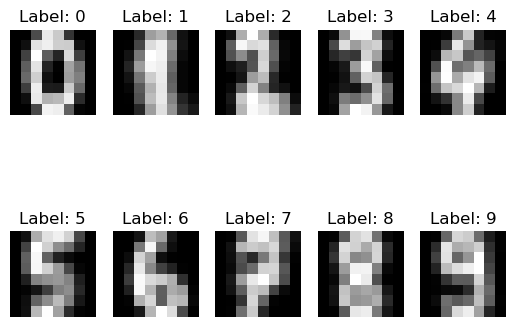

In [46]:
bfig, axs = plt.subplots(ncols=5, nrows=2)
for classe, ax in zip(classes_list, axs.ravel()):
    mask_img = y == classe
    ax.imshow(
        X[mask_img].mean(axis=0).reshape((8, 8)),
        cmap="gray"
    )
    ax.axis("off")
    ax.set_title(f"Label: {classe}")

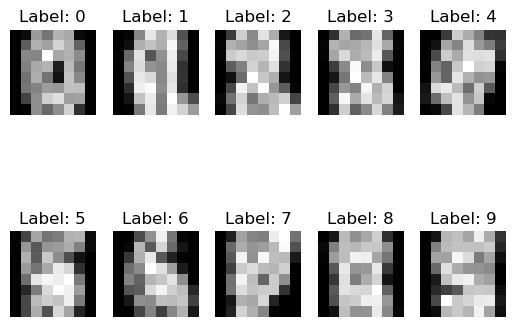

In [47]:
fig, axs = plt.subplots(ncols=5, nrows=2)
for classe, ax in zip(classes_list, axs.ravel()):
    mask_img = y == classe
    ax.imshow(
        X[mask_img].std(axis=0).reshape((8, 8)),
        cmap="gray"
    )
    ax.axis("off")
    ax.set_title(f"Label: {classe}")

# Classification par centroïdes les plus proches

Le but de cet exercice est d'implémenter votre propre classificateur basé sur une idée intuitive.
Pour une nouvelle image, nous allons prédire la classe pour laquelle le chiffre moyen est le plus proche (dans l'espace des caractéristiques).

Exercice:
* diviser l'ensemble de données en deux parties. Les variables X_train, y_train, X_test et y_test représentent respectivement les données d'apprentissage et les étiquettes, ainsi que les données de test et les étiquettes.
* Pour chaque classe, calculez l'image digitale moyenne sur l'ensemble d'apprentissage. Nous appellerons la variable résultante `centroids_train`.
* Pour chaque échantillon de l'ensemble de test, calculez les centroïdes les plus proches. Calculez le pourcentage de bonnes prédictions pour évaluer les performances de votre classificateur.

In [48]:
mask_train = np.ones(y.shape, dtype=bool)
mask_train[len(y) // 2:] = False # 50/50 split
mask_test = ~mask_train # inverse le masque
##
X_train, X_test = X[mask_train], X[mask_test]
y_train, y_test = y[mask_train], y[mask_test]

In [49]:
centroids_train = []
for classe in classes_list:
    mask_img = y_train == classe
    centroids_train.append(X_train[mask_img].mean(axis=0))
centroids_train = np.array(centroids_train)

(10, 64)

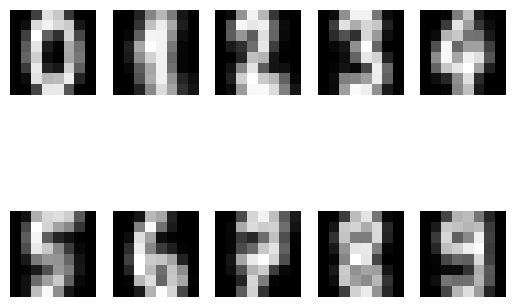

In [51]:
fig, axs = plt.subplots(ncols=5, nrows=2)
for img, ax in zip(centroids_train, axs.ravel()):
    ax.imshow(
        img.reshape((8, 8)), cmap="gray"
    )
    ax.axis("off")
centroids_train.shape

In [64]:
from scipy.spatial.distance import cdist

y_pred = cdist(X_test, centroids_train).argmin(axis=1)

In [65]:
img_dst = []
for img_test in X_test:
    dist = []
    for centroid in centroids_train:
        dist.append(np.sqrt(np.sum((img_test - centroid)**2)))
    img_dst.append(dist)
img_dst = np.array(img_dst)

In [57]:
img_dst.argmin(axis=1)

array([9, 8, 4, 9, 0, 8, 9, 1, 2, 2, 3, 4, 5, 6, 7, 8, 9, 0, 2, 2, 3, 4,
       9, 6, 7, 8, 9, 0, 2, 2, 3, 4, 9, 6, 7, 8, 9, 0, 9, 9, 9, 6, 9, 0,
       9, 8, 9, 8, 4, 3, 7, 7, 3, 9, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7,
       3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 9, 2, 8, 2, 0, 0, 1, 7, 6, 3,
       2, 2, 4, 6, 3, 2, 3, 9, 1, 7, 6, 8, 4, 3, 2, 4, 0, 5, 3, 6, 9, 6,
       2, 7, 9, 4, 4, 7, 2, 8, 2, 2, 9, 7, 9, 5, 4, 4, 9, 0, 8, 9, 8, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 3, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,
       3, 5, 1, 0, 0, 7, 2, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 7,
       9, 1, 5, 0, 5, 5, 2, 8, 3, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1,
       7, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7,
       2, 8, 2, 2, 5, 7, 3, 5, 4, 2, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
       7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 5, 9, 5, 4,

In [58]:
y_test

array([8, 8, 4, 9, 0, 8, 9, 8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0,
       9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7,
       3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3,
       2, 1, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 4, 9, 0, 8, 9, 8, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,
       3, 5, 1, 0, 0, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1,
       3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7,
       2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
       7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4,

<AxesSubplot:>

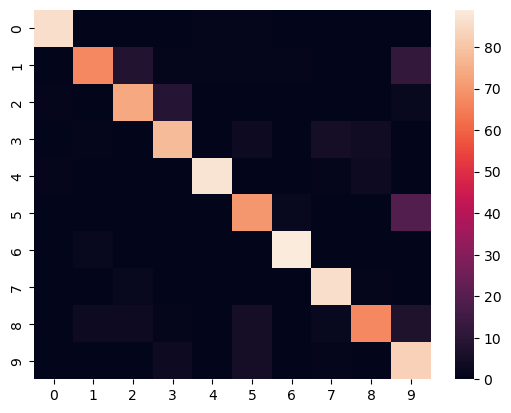

In [72]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, )

In [69]:
from scipy.spatial.distance import cdist
from sklearn.base import BaseEstimator, ClassifierMixin

# Estimateur Scikit-Learn par héritage
class NearestCentroidClassifier(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        centroids_train = []
        self.classes_ = np.unique(y)
        for klazz in self.classes_:
            mask_img = y == klazz
            centroids_train.append(X[mask_img].mean(axis=0))
        self.centroids_train = np.array(centroids_train)
        return self
        
    def predict(self, X):
        return cdist(X_test, centroids_train).argmin(axis=1)

In [70]:
clf = NearestCentroidClassifier()

In [71]:
clf.fit(X_train, y_train).predict(X_test)

array([9, 8, 4, 9, 0, 8, 9, 1, 2, 2, 3, 4, 5, 6, 7, 8, 9, 0, 2, 2, 3, 4,
       9, 6, 7, 8, 9, 0, 2, 2, 3, 4, 9, 6, 7, 8, 9, 0, 9, 9, 9, 6, 9, 0,
       9, 8, 9, 8, 4, 3, 7, 7, 3, 9, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7,
       3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 9, 2, 8, 2, 0, 0, 1, 7, 6, 3,
       2, 2, 4, 6, 3, 2, 3, 9, 1, 7, 6, 8, 4, 3, 2, 4, 0, 5, 3, 6, 9, 6,
       2, 7, 9, 4, 4, 7, 2, 8, 2, 2, 9, 7, 9, 5, 4, 4, 9, 0, 8, 9, 8, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 3, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,
       3, 5, 1, 0, 0, 7, 2, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 7,
       9, 1, 5, 0, 5, 5, 2, 8, 3, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1,
       7, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7,
       2, 8, 2, 2, 5, 7, 3, 5, 4, 2, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
       7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 5, 9, 5, 4,

In [63]:
clf.score(X_test, y_test)

0.8754171301446051